In [73]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime

# Import the file 
Disney_df = pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Disney-Stock-Data\Resources\DisneyHistoricalStockPriceData.csv")

Robinhood_df = pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Disney-Stock-Data\Resources\Disney Robinhood Data.csv")

Robinhood_df["timestamp"].astype(str)

Robinhood_df['Time']=""

Robinhood_df[['Date','Time']] = Robinhood_df.timestamp.str.split(" ",expand=True)

Robinhood_df[['Month','Day','Year']]=Robinhood_df.Date.str.split("/",expand=True)

Robinhood_df

,timestamp,users_holding,Time,Date,Month,Day,Year
0,5/2/2018 4:56,59936,4:56,5/2/2018,5,2,2018
1,5/2/2018 6:41,59936,6:41,5/2/2018,5,2,2018
2,5/3/2018 0:38,59950,0:38,5/3/2018,5,3,2018
3,5/3/2018 6:36,59950,6:36,5/3/2018,5,3,2018
4,5/3/2018 6:51,59950,6:51,5/3/2018,5,3,2018
...,...,...,...,...,...,...,...
14910,2/17/2020 4:50,218542,4:50,2/17/2020,2,17,2020
14911,2/17/2020 5:50,218542,5:50,2/17/2020,2,17,2020
14912,2/17/2020 6:50,218542,6:50,2/17/2020,2,17,2020
14913,2/17/2020 7:50,218542,7:50,2/17/2020,2,17,2020


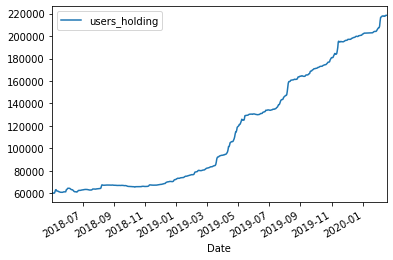

In [76]:
# Change the date column to datetime in order to have harmony with the disney stock price data
Robinhood_df['Date']=pd.to_datetime(Robinhood_df['Date'])

# In order to work with less rows and get one data point for each day, we can groupby the date
# Less rows = less parsing = less processing = increased efficiency


Robinhood_grouped=Robinhood_df.groupby(['Date']).mean()
Robinhood_grouped.plot()

In [61]:
# CLEANING THE DISNEY STOCK DATA
# Pass in a list to name the header
Disney_df.columns = ["date","open","high","low","close","volume"]

# Delete the previous row by deleting rows with the word "open"
disney_df = Disney_df[Disney_df["open"] != "Open"]

# Pulling just the dates along with the close 
Disney_cleaned_short = Disney_cleaned[["date","close"]]
# Disney_cleaned_short.rename(index=int)

Disney_cleaned_short["close"]=pd.to_numeric(Disney_cleaned_short["close"])
Disney_cleaned_short["date"]=pd.to_datetime(Disney_cleaned_short["date"])

Disney_cleaned_short

,date,close
1,2020-06-18,118.37
2,2020-06-17,117.65
3,2020-06-16,118.44
4,2020-06-15,117.08
5,2020-06-12,115.49
...,...,...
12529,1972-06-07,1.69
12530,1972-06-06,1.68
12531,1972-06-05,1.68
12532,1972-06-02,1.68


In [79]:
# merge_df=pd.merge(Disney_cleaned_short,Robinhood_grouped,on='Date')

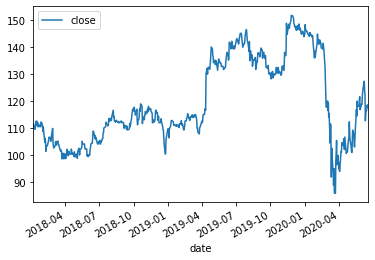

In [75]:
disney_df = disney_df[["date","close"]]
disney_df["date"] = pd.to_datetime(disney_df["date"])
disney_df["close"] = pd.to_numeric(disney_df["close"])
fixed_disney = disney_df.set_index("date")
# fixed_disney = fixed_disney[fixed_disney["date"] >='2000-02-02']
fixed_disney[:640].plot()

In [ ]:
# Import a column that shows the change between the open and close price for the day

# Pass in the columns to be subtracted as integers with pandas
Disney_cleaned["Change"] = pd.to_numeric(Disney_cleaned["open"]) - pd.to_numeric(Disney_cleaned["close"])

# Change date column to datetime so data is uniform
# Disney_cleaned['date']=pd.to_datetime(Disney_cleaned['date'])

# Change datetime in shortened disney dataframe
# Disney_cleaned_short['date']=pd.to_datetime(Disney_cleaned_short['date'])

Disney_cleaned_short_final = Disney_cleaned_short[:-11900]
Disney_cleaned_final = Disney_cleaned[:-11900]
try:
    Disney_cleaned_final.values.astype(int)
except ValueError:
    pass
Disney_cleaned_final.dtypes